# SALES CONVERSION OPTIMIZATION

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import tkinter

In [2]:
df= pd.read_csv("KAG_conversion_data.csv")
df.head()

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

WE OBSERVE THAT THERE ARE THREE DISTINCT CAMPAIGNS. TO SIMPLIFY, WE NAME THEM AS Campaign_1,2 & 3.

In [4]:
df["xyz_campaign_id"].replace({916:"Campaign_1",936:"Campaign_2",1178:"Campaign_3"}, inplace=True)
df.head()

ad_id xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746      Campaign_1          103916  30-34      M        15   
1  708749      Campaign_1          103917  30-34      M        16   
2  708771      Campaign_1          103920  30-34      M        20   
3  708815      Campaign_1          103928  30-34      M        28   
4  708818      Campaign_1          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

# 1. optimizing the social ad campaigns for the highest conversion rate possible? 
(Attain best Reach to Conversion ratios/Click to Conversion ratios)

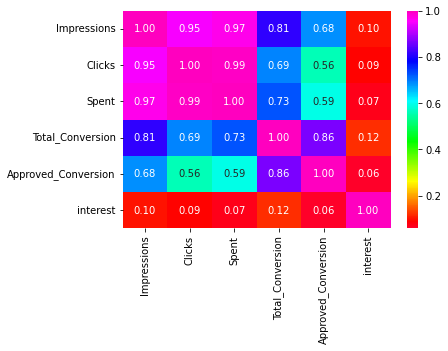

In [60]:
sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion","interest"]].corr(),annot=True,fmt=".2f",cmap="gist_rainbow")
plt.show()

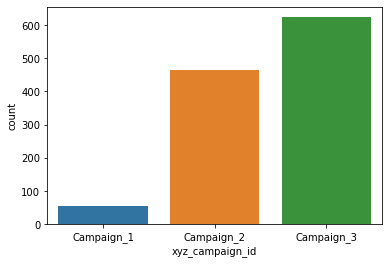

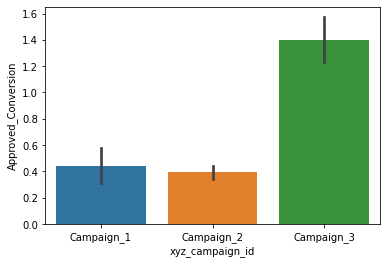

In [61]:
sns.countplot(x='xyz_campaign_id',data=df)
plt.show()
sns.barplot(x='xyz_campaign_id',y='Approved_Conversion',data=df)
plt.show()

Campaign_3 had maximum number of ads and therefore had the best approved conversion rate. However, Campaign_1 had the least ads but performed better than Campaign_2.

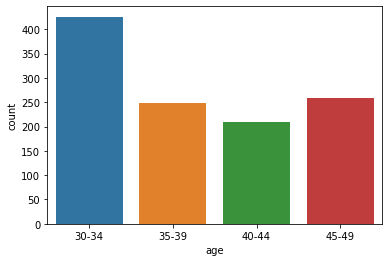

In [62]:
sns.countplot(x ='age', data = df) 
plt.show() 

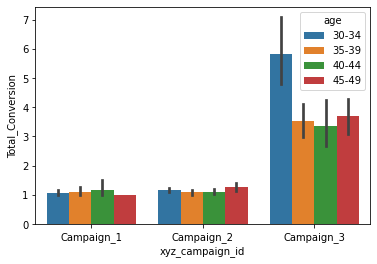

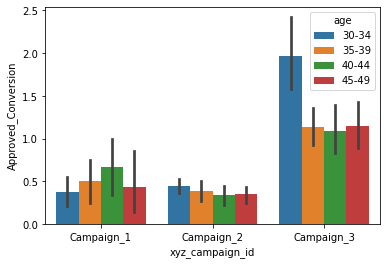

In [63]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Total_Conversion"], hue=df["age"], data=df)
plt.show()
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=df)
plt.show()

Ages 30-34 viewed the maximum number of ads, and also had the maximum total and approved conversion.

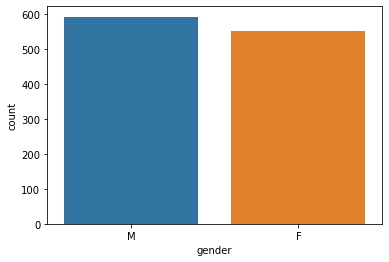

In [64]:
sns.countplot(data=df,x='gender')
plt.show()

Equal number of people from both the genders were approached during the campaign.

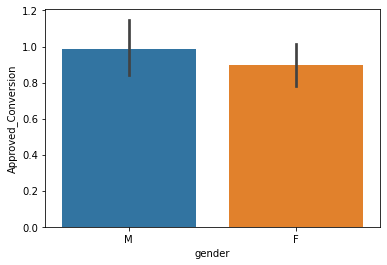

In [65]:
sns.barplot(y=df["Approved_Conversion"],x=df["gender"])
plt.show()

Approved conversion was nearly equal from both males and females

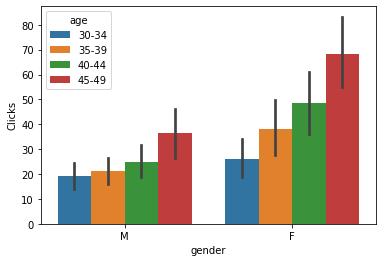

In [66]:
sns.barplot(y=df["Clicks"],x=df["gender"],hue=df["age"])
plt.show()

Females in the range 45-49 clicked the most.

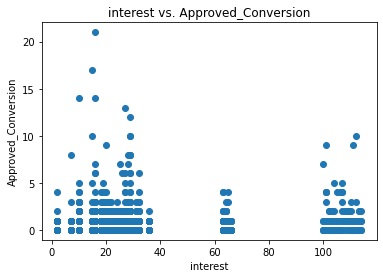

In [67]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

Maximum approved conversion is from the interest range 10 to 30.

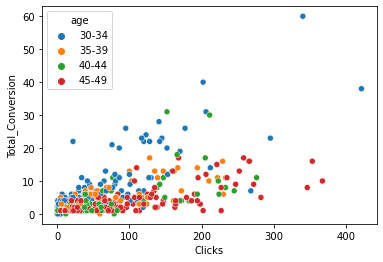

In [68]:
sns.scatterplot(x=df["Clicks"],y=df["Total_Conversion"],hue=df["age"])
plt.show()

Conversion to clicks ratio is highest for 30-34 age range.

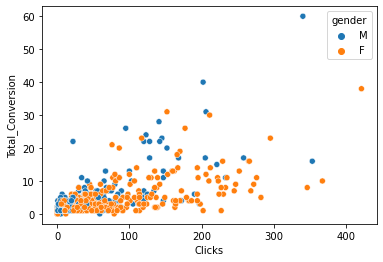

In [69]:
sns.scatterplot(x=df["Clicks"],y=df["Total_Conversion"],hue=df["gender"])
plt.show()

Conversion to clicks ratio is higher for males than females

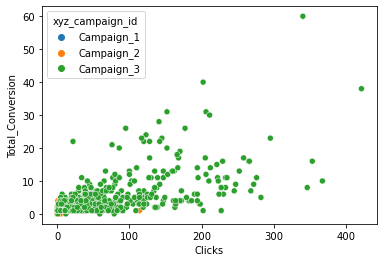

In [70]:
sns.scatterplot(x=df["Clicks"],y=df["Total_Conversion"],hue=df["xyz_campaign_id"])
plt.show()

# 2. Finding the perfect target demographics with the appropriate click through rates.


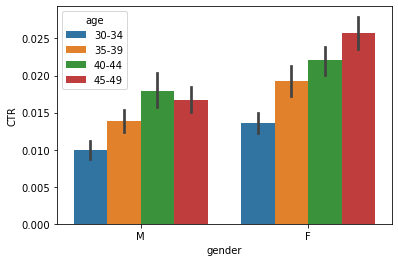

In [71]:
df['CTR'] = (df['Clicks'] / df['Impressions'])*100
sns.barplot(y=df['CTR'],x=df['gender'],hue=df['age'])
plt.show()

Click-through rate (CTR) is the ratio of users who click on a specific link to the number of total users who view a page, email, or advertisement.
We observe that the CTR is highest in the females in the age range (45-49). People in the age range 30-34 have the highest approved conversion rate and total conversion rate, i.e, they buy the the products the most.

# 3. Understanding the ideal turnaround/decision making time per age group to convert and re-target future social campaigns.
Age Group 30-34: This age group has lesser percentage of click through rates but they have higher ratio in buying the product and doing enquiry about the product. Hence, they are risk takers who sees the ad clicks and most of the time takes the product with less time in decision making. They are followed by 35-39 and 40-44. 

Age group 45-49: This age group clicks on the ads most no. of times but don't buy the product or enquire frequently.


# Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.
It is clear that Campaign_3 was the best among all three, followed by Campaign_1, keeping in mind the scale of the campaign.